# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 <br></br>
 - In India, the growth of new car sales have slowed down from the reacent past, on the other hand, the pre-owned car market has continued to grow over the past few years. According to 2018-19 data, the new cars sales were around 3.6 million units, and around 4 million second-hand car were bought and sold. Some car owners even replace their old vehicles with second-hand cars instead of buying a new one. Judging by the data, it seems that the car market is shifting towards second-hand cars.
 - Being able to predict used cars price becomes important in several ways. First of all, based on above information, the market size of second-hand cars are growing, so is the profit related to this market. Secondly, personal second hand car sellers usually do not have enough knowledge to properly price their car. Building a model that is able to predict prices will help its user to quickly determine a suitable price for their owned cars, as well as to find underpriced used cars in the market, they will be able to buy it and sell it at the actual price to gain the price difference profit. Lastly, solving this problem will help us find out the major factors that influence used car prices, we will be able to choose the most suitable car to buy or sell.

### **The objective:**

 - What is the intended goal?
  <br></br>
 - The intended goal is to find and build the best model that is able to predict the price of used cars based on given data. This will leading us being able to develop profitable strategies based on the model.

### **The key questions:**

- What are the key questions that need to be answered?
 <br></br>
- How should we clean the given csv file?
- What are some trends shown within the data?
- What is the best perameters for model training?
- What does the final model tell us?
- What is the recommendations based on the model and observations?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
 <br></br>
- What are the factors affecting used cars price? How should we effectively price used cars?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [60]:
# import data manipulation libraries
import pandas as pd
import numpy as np

# import graph plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# import missing data distribution library
import missingno as msno

# import model related libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
# load data
data = pd.read_csv("used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# sample 5 data to have a brief idea
data.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
6588,6588,Maruti Wagon R LXI,Kolkata,2014,54841,Petrol,Manual,First,22.50,998.0,67.04,5.0,4.75,NaN
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.00,5.0,NaN,12.75
2665,2665,Maruti Alto K10 VXI,Kochi,2018,46805,Petrol,Manual,First,24.07,998.0,67.10,5.0,4.09,3.63
454,454,Toyota Innova 2.5 V Diesel 7-seater,Hyderabad,2015,80883,Diesel,Manual,First,12.80,2494.0,102.00,7.0,NaN,13.50
1054,1054,Tata Indigo GLE,Hyderabad,2017,23228,Petrol,Manual,First,14.40,1396.0,65.00,5.0,NaN,4.50


In [4]:
# check data type for each column, and also the number of rows and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [5]:
# check null values and percentage of null values
print(data.isna().sum())
print()
print(data.isna().sum()/len(data)*100)

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64


**Observations:**

- 8 variables have no missing values, and 6 variables have missing values.
- New_price has around **86%** of data missing, Price also have **17%** of the data missing.
- Power has **2.4%** of data missing, and the rest of the variables have **less than 1%** of data missing.


In [6]:
# check number of unique values for each feature
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

**Observations:**

- S.No. has the same number of unique values as the number of rows, it is an index that needs to be dropped.
- There are 2041 different car names, it is too large of a number to create dummy variables, it is likely to be dropped later.
- There are 11 different locations where the car is available.
- The kilometers_Driven only have 3660 different values, they are likely rounded from actual numbers.
- The Transmission, Owner_Type, Fuel_Type each has 2, 4, and 5 different groups.


In [7]:
# Based on above observation, we need to drop S.No.
data.drop('S.No.', axis=1, inplace=True)

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [8]:
# describe the data, both numeric and categorical
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


**Observations (numerical):**

- The year of the cars ranges from 1996 to 2019, over 50% of the cars were built within or after year 2014.
- There exists almost-new car which was only driven for 171 km, there is also a car that had driven for 6,500,000 km. This large value is likely an error. On average, used cars had driven for around 58,700 km.
- On average, used cars can drive 18 km/L. There is at least a car with 0 km/L, this is likely an error.
- 50% of the cars have engine between 1198 and 1968, but there are outliers that can go as low as 72 and as high as 5998.
- Similar to engine, the majority of the cars have power between 34.2 and 138.1, but there is also cars with extremly high power that can go as high as 616.
- Over 50% of the cars have 5 seats, the seats a car has ranges from 2 to 10.
- On average, the price of a used car will become about 40% of the price of a new car of the same model.

In [9]:
# checking the unique values for categorial, except name
for col in data.select_dtypes(include = 'object').columns:
    if data[col].nunique() < 15:
        print('Column', col, 'has', str(data[col].nunique()), 'different values, they are:' )
        for name in data[col].unique():
            if name == data[col].unique()[-1]: print(name)
            else: print(name, end=', ')
        print('-'*50)

Column Location has 11 different values, they are:
Mumbai, Pune, Chennai, Coimbatore, Hyderabad, Jaipur, Kochi, Kolkata, Delhi, Bangalore, Ahmedabad
--------------------------------------------------
Column Fuel_Type has 5 different values, they are:
CNG, Diesel, Petrol, LPG, Electric
--------------------------------------------------
Column Transmission has 2 different values, they are:
Manual, Automatic
--------------------------------------------------
Column Owner_Type has 4 different values, they are:
First, Second, Fourth & Above, Third
--------------------------------------------------


**Observations (categorical):**

- There are total of 2041 different car names, the most frequent one has a frequency of 55.
- For locations, the cars were sold in 11 different locations. The location that sells the most is Mumbai.
- There are total of 5 diffenerent fuel types, which are CNG, Diesel, Petrol, LPG, Electric.
- The cars are either manual or automatic.
- The data records 4 different owner_type, which are first, second, third, and forth & above.

In [10]:
# checking extreme values in kilometers driven
data.sort_values('Kilometers_Driven', ascending=False).head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.0
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0


**Observations:**
- The extreme value in kilometers_driven is unlikely to happen, because the car is too new to drive so much.

In [11]:
# drop the extreme value
data.drop(2328, axis=0, inplace=True)

In [12]:
# checking extreme values in mileage
data.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


In [13]:
# count the number of data where mileage equals to 0
tmp = data['Mileage'].value_counts().to_dict()
print('Mileage of 0 counts:', tmp[0.0])

Mileage of 0 counts: 81


**Observations:**
- There are 81 cars have a mileage of 0.0, this is an error that should be fixed.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [14]:
# univariate analysis for numerical variables
def histogram_boxplot(col):
    _, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = (15, 10))
    
    sns.boxplot(col, ax=ax_box2, showmeans=True)
    sns.distplot(col, ax=ax_hist2, kde=True)
    print('skewness:', col.skew())

skewness: 3.832545848818344


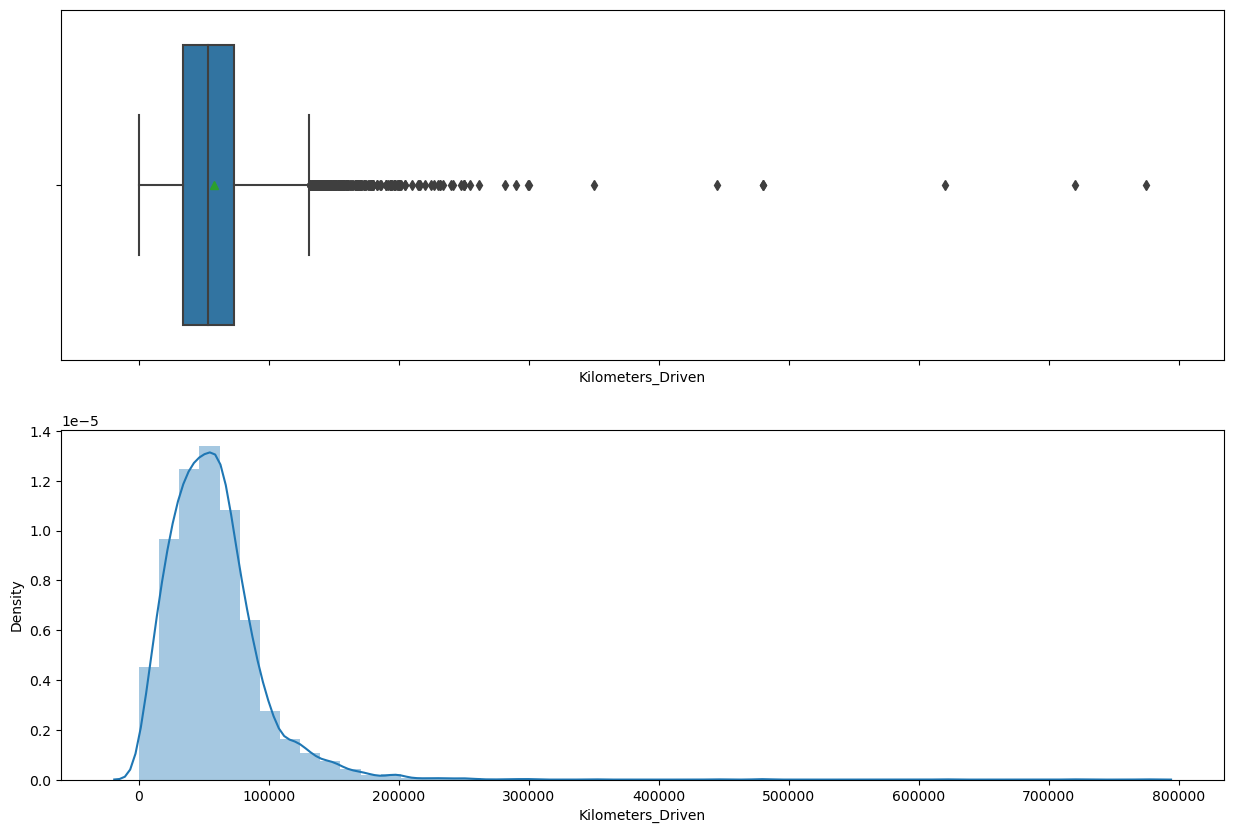

In [15]:
# check Kilometers_Driven
histogram_boxplot(data.Kilometers_Driven)

skewness: 3.337576076530038


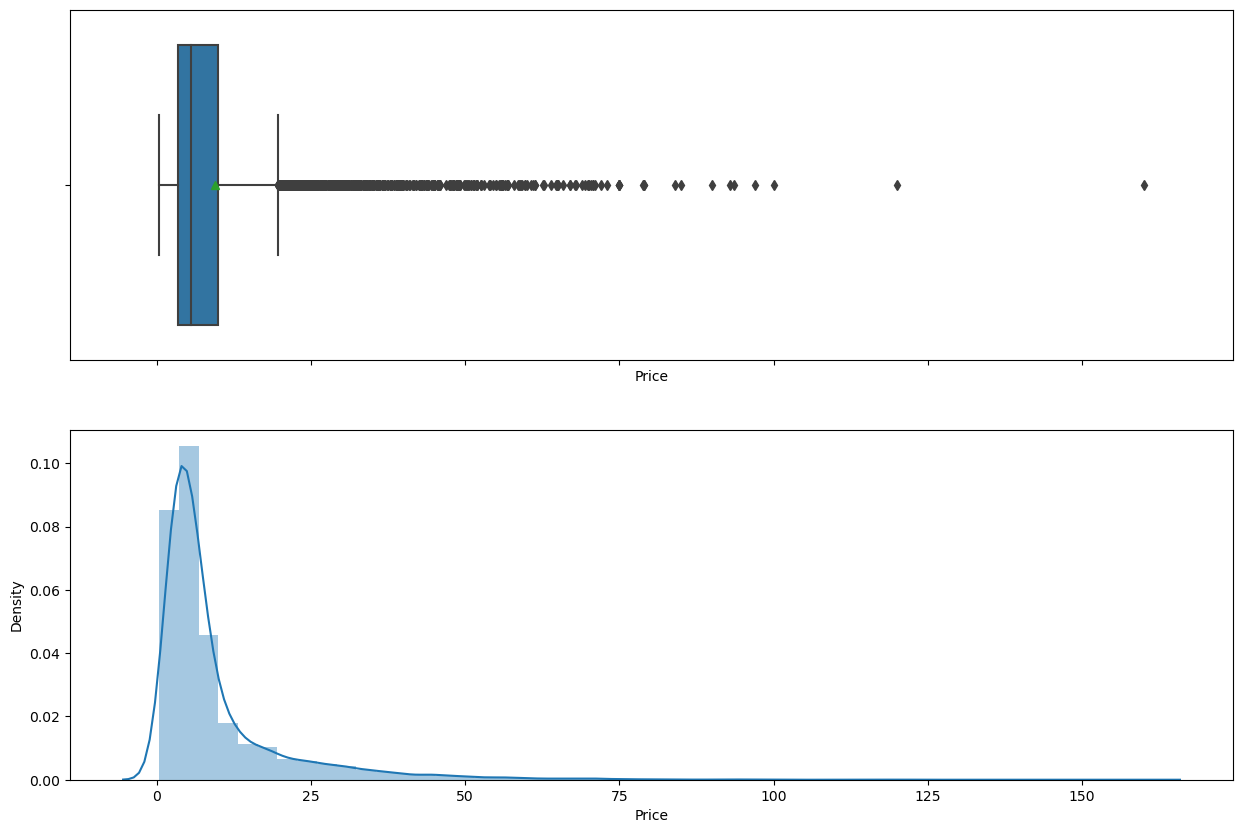

In [16]:
# check Price
histogram_boxplot(data.Price)

skewness: 1.9624262822569614


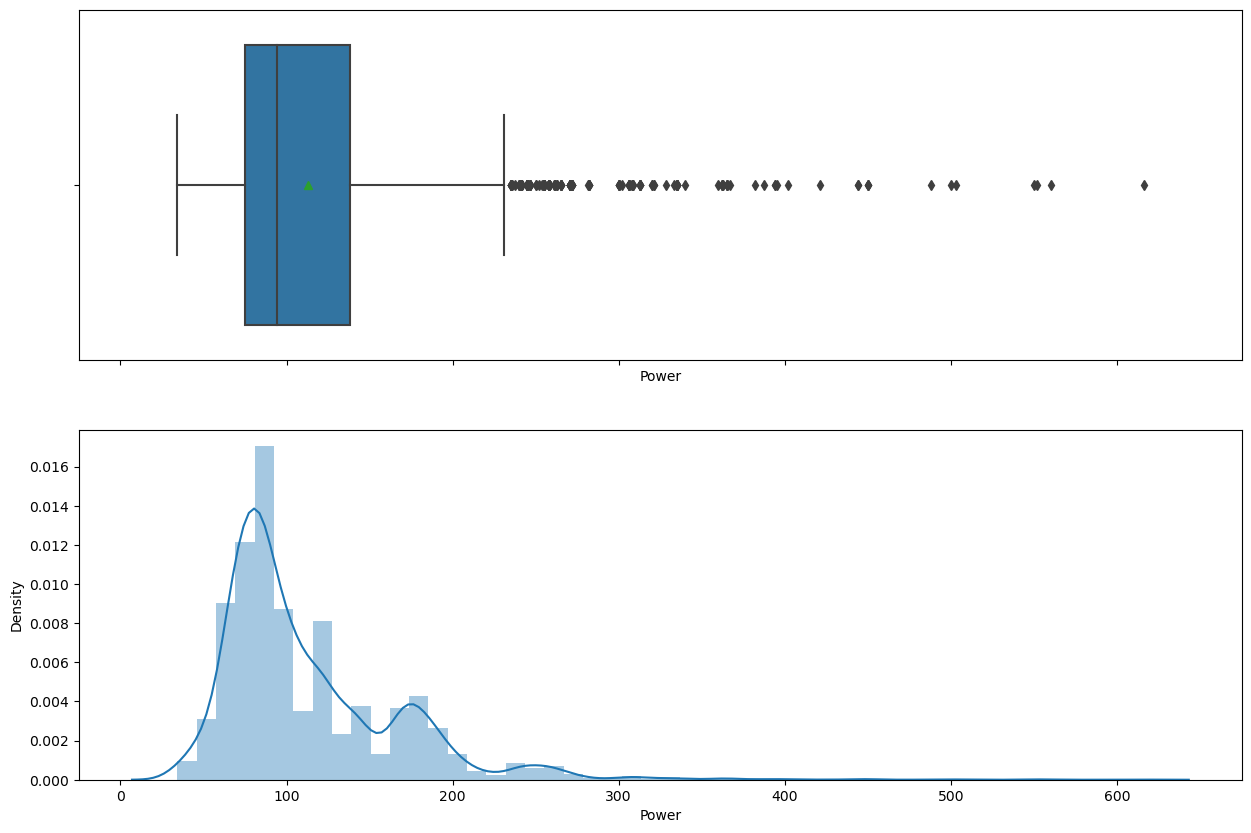

In [17]:
# check Power
histogram_boxplot(data.Power)

skewness: 1.413133430829896


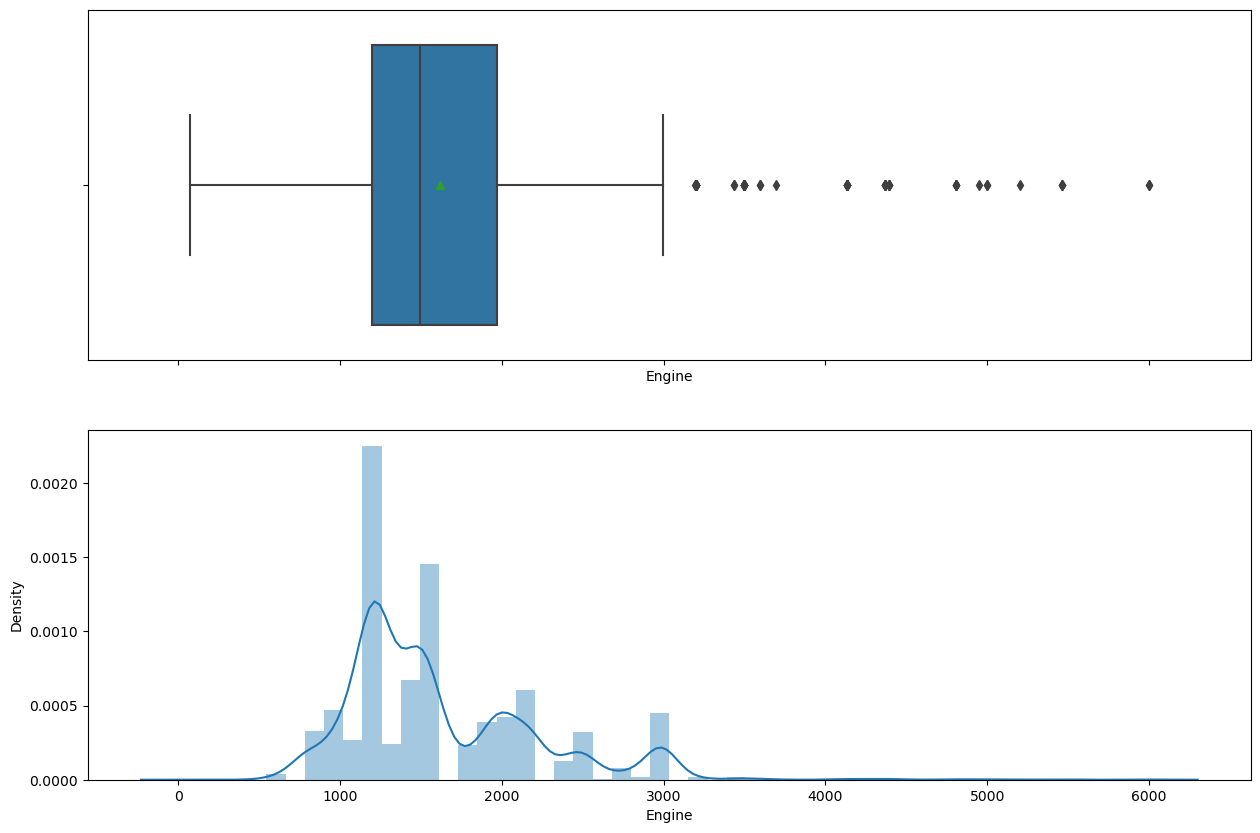

In [18]:
# check Engine
histogram_boxplot(data.Engine)

**Observations (numerical):**
- All 4 variables are right skewed.
- Kilometers_Driven and Price shows strong right skewness, it is better to use log transformation on them.
- The number of outliers for engine are significantly lower than the other variables.

In [19]:
# use log transformation on Kilometers_Driven and Price
data["Kilometers_Driven_Log"] = np.log(data["Kilometers_Driven"])
data["Price_Log"] = np.log(data["Price"])

In [20]:
def count_with_perc(col, rot=None):
    total = len(data[col])
    ax = sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    
    if rot: plt.xticks(rotation=rot)
    
    for p in ax.patches:
        perc = str(round(100 * p.get_height() / total, 1)) + '%'
        x = p.get_x() + p.get_width() / 2 - (0.4 if rot else 0.15)
        y = p.get_y() + p.get_height() + 0.3
        ax.annotate(perc, (x, y), size=14 if not rot else 10)
    plt.show()

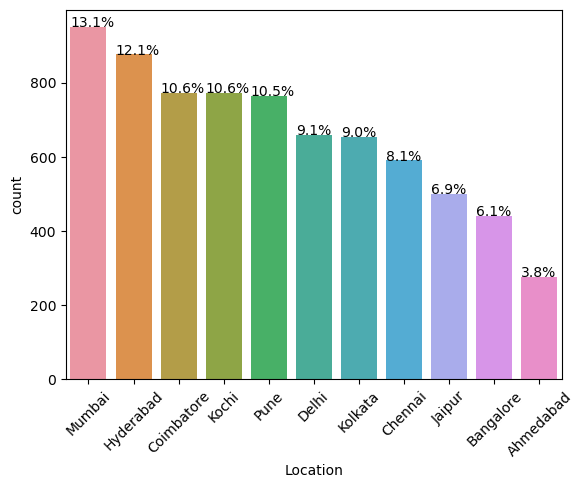

In [21]:
# see percentage for each category for Location
count_with_perc('Location', 45)

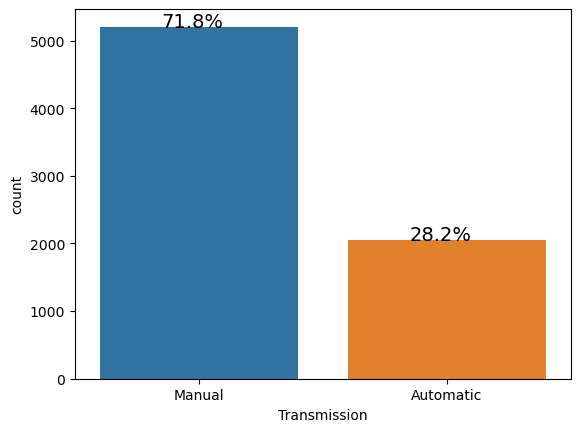

In [22]:
# see percentage for each category for Transmission
count_with_perc('Transmission')

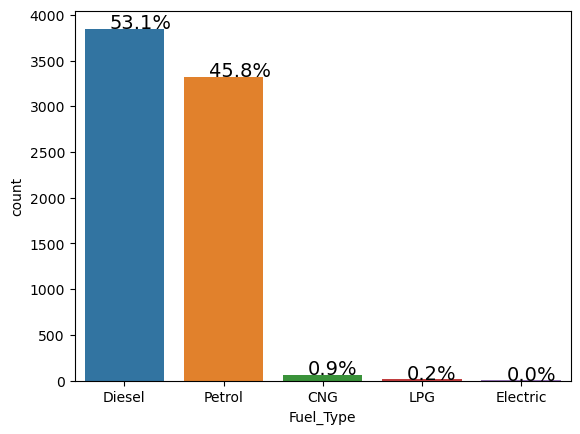

In [23]:
# see percentage for each category for Fuel_Type
count_with_perc('Fuel_Type')

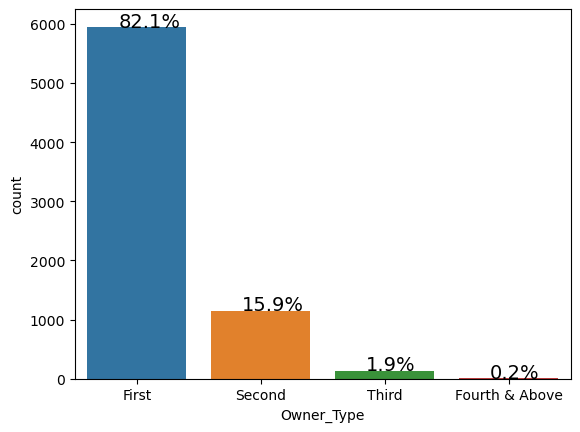

In [24]:
# see percentage for each category for Owner_Type
count_with_perc('Owner_Type')

**Observations (categorical):**
- None of the locations have extremely higher or lower number, the location with minimal second hand cars is Ahmedabad, which only has 3.8% of cars.
- Manual cars are about 2.5 times more than automatic cars.
- Only very few cars have fuel type of CNG, LPG, or Electric. About 98.9% of second hand cars have fuel type of diesel or petrol.
- Most of the cars comes from first hand, which suggests that people who bought second hand cars is unlikely to sell it to the market again. This might also be an indication that second hand market is a newly developed market as second hand car buyers have yet to sell their used car to buy a newer second hand car.  

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

<AxesSubplot:xlabel='Kilometers_Driven_Log'>

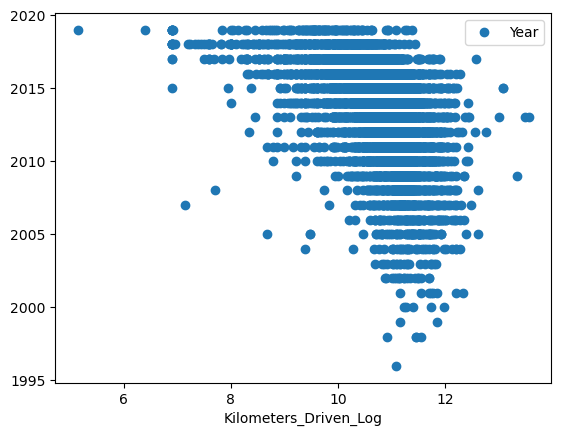

In [25]:
# scatter plot between Kilometers_Driven_Log and Year
data.plot(x="Kilometers_Driven_Log", y='Year', style='o')

<AxesSubplot:xlabel='Price_Log'>

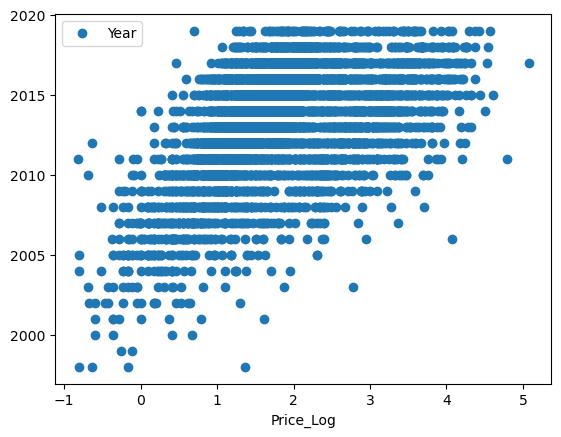

In [26]:
# scatter plot between Price_Log and Year
data.plot(x="Price_Log", y='Year', style='o')

**Observations:**
- The newer the year, the higher the change for a car to have lower kilometers driven.
- The price of the second hand cars increase as the car get newer. Newer cars tend to be more expensive, they also have wider range of price.

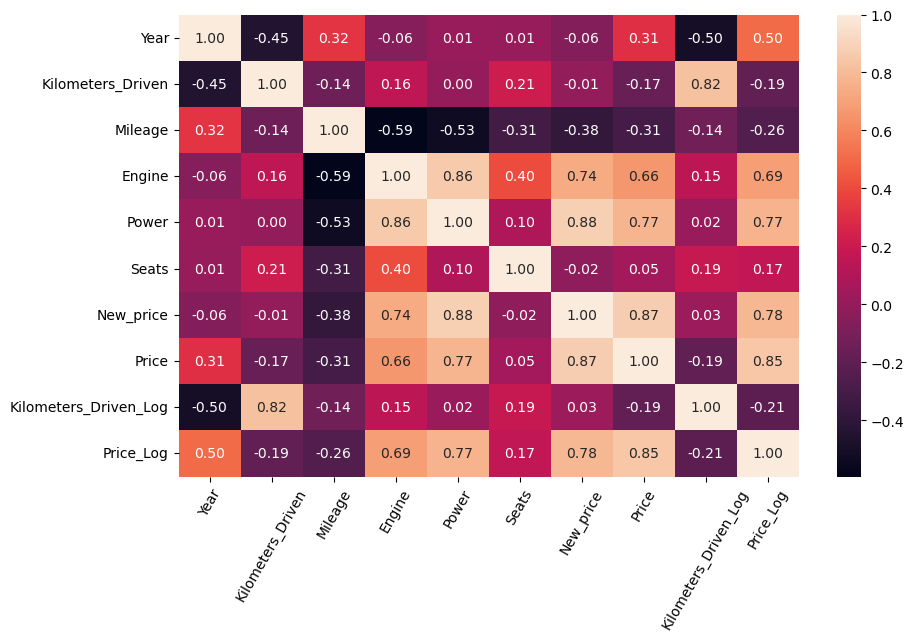

In [27]:
# Plot heatmap to see correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f')
plt.xticks(rotation=60)
plt.show()

**Observations:**
- Price and New_price have strong correlation. When building model using price_log as dependent variable, it is better to drop new_price, and price.
- There is high correlation between Engine and Power, it is better to drop one of them.
- Year have medium correlation with kilometers_driven_log and price_log.
- Mileage have negative correlations with all other variables except year, but none of them are very strong.
- Seats does not show strong correlation with any of the other variables.

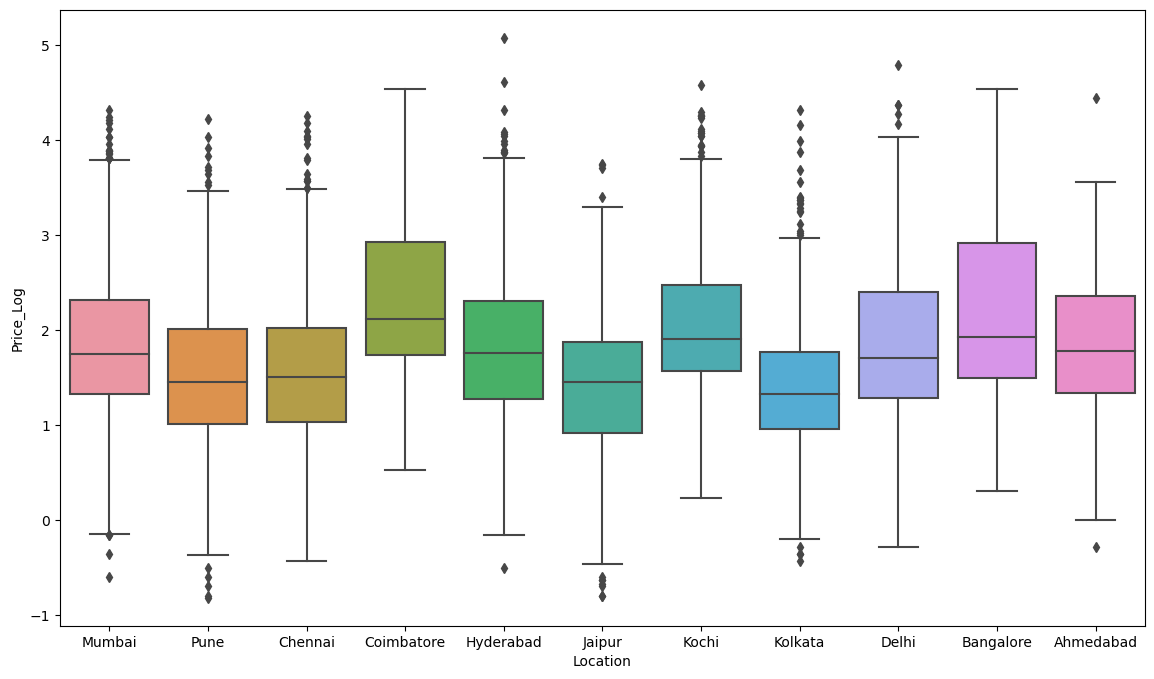

In [28]:
# boxplot for Location and Price_Log
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Price_Log', data=data)
plt.show()

**Observations:**
- There is no significant price difference between each location.
- Pune and Jaipur has the cheapest second hand cars, while Hyderabad has the most expensive cars.
- On average, Coimbatore's cars are the most expensive.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [29]:
# extract Brand and Model from Name
data['Brand'] = data['Name'].apply(lambda x: x.split(' ')[0].lower())
data['Model'] = data['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]).lower())

In [30]:
# count unique Brand
data['Brand'].nunique()

32

In [31]:
# count unique Model
data['Model'].nunique()

2017

**Observations:**
- There are only 32 different brands in the given data.
- There are over 2000 models, which means there are a wide variety of cars to choose from.
- It is important to note that the way the names were extracted will wrongly extract brand names that are made of more than one word. Such as "Land Rover".

### **Missing value treatment**

In [32]:
# check missing values
data.isna().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
Kilometers_Driven_Log       0
Price_Log                1234
Brand                       0
Model                       0
dtype: int64

In [33]:
# check error number in Mileage
data.Mileage.eq(0.0).sum()

81

- Aside from null values, we also need to treat Mileage values that equals to 0 as it is not possible for used cars to have a Mileage of 0.

In [34]:
# Function that gives an idea of distribution of missing values in group by different columns, 
# the assumption here is that cars with the same name should have the same Engine, Power and Seats. 
# (so this function mostly check Name column)
def read_MissingOrZero_value(col, compare):
    tmp_data = data[data[col].isna()]
    for c in compare:
        print(c)
        for name in tmp_data[c].unique():
            print(name, (tmp_data[c] == name).sum()/(data[c] == name).sum())
        print()

#### **Missing Seats treatment**

In [35]:
# check missing value percentage of Seats group by Name or Brand
read_MissingOrZero_value('Seats', ['Name', 'Brand'])

Name
Honda City 1.5 GXI 0.6
Maruti Swift 1.3 VXi 1.0
Ford Figo Diesel 1.0
Land Rover Range Rover 3.0 D 1.0
Honda City 1.3 DX 1.0
Maruti Swift 1.3 ZXI 1.0
Land Rover Range Rover Sport 2005 2012 Sport 1.0
Honda City 1.5 EXI 0.2
Maruti Swift 1.3 LXI 1.0
Hyundai Santro LP zipPlus 1.0
Toyota Etios Liva V 0.6666666666666666
Maruti Swift 1.3 VXI ABS 1.0
Maruti Estilo LXI 1.0
BMW 5 Series 520d Sedan 1.0
Hyundai Santro GLS II - Euro II 1.0
Maruti Wagon R Vx 1.0
Ford Endeavour Hurricane LE 1.0
Honda CR-V AT With Sun Roof 1.0
Fiat Punto 1.3 Emotion 1.0
Hyundai Santro Xing XG 1.0
Honda Jazz Select Edition 0.5
Fiat Punto 1.2 Dynamic 1.0
Fiat Punto 1.4 Emotion 1.0
Skoda Laura 1.8 TSI Ambition 1.0
Toyota Etios Liva Diesel TRD Sportivo 1.0
Hyundai i20 new Sportz AT 1.4 1.0
Mahindra TUV 300 P4 1.0
Honda Jazz 2020 Petrol 1.0

Brand
honda 0.010767160161507403
maruti 0.0110803324099723
ford 0.005698005698005698
land 0.04477611940298507
hyundai 0.005970149253731343
toyota 0.005917159763313609
bmw 0.0225080

- Some of the missing values have other rows that has the same name but the seats is not missing, we can use these values to fill the missing ones, for the rest that does not have a value to refer from, we will use the mode value of their brand to fill the missing value as the mode suggests the number of seats this brand is likely to manufacture.

In [36]:
# Fill missing Seats value based on the same Name
data['Seats'] = data.groupby('Name')['Seats'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x)

In [37]:
# Fill the rest of the missing Seats value based on the Brand
data['Seats'] = data.groupby('Brand')['Seats'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x)

In [38]:
# No more missing value in Seats
data.Seats.isna().sum()

0

#### **Missing Engine treatment**

In [39]:
# check missing value percentage of Engine group by Name or Brand
read_MissingOrZero_value('Engine', ['Name', 'Brand'])

Name
Honda City 1.5 GXI 0.6
Maruti Swift 1.3 VXi 1.0
Land Rover Range Rover 3.0 D 1.0
Honda City 1.3 DX 1.0
Maruti Swift 1.3 ZXI 1.0
Land Rover Range Rover Sport 2005 2012 Sport 1.0
Maruti Swift 1.3 LXI 1.0
Hyundai Santro LP zipPlus 1.0
Toyota Etios Liva V 0.6666666666666666
Maruti Swift 1.3 VXI ABS 1.0
BMW 5 Series 520d Sedan 1.0
Hyundai Santro GLS II - Euro II 1.0
Maruti Wagon R Vx 1.0
Honda CR-V AT With Sun Roof 1.0
Fiat Punto 1.3 Emotion 1.0
Hyundai Santro Xing XG 1.0
Honda Jazz Select Edition 0.5
Fiat Punto 1.2 Dynamic 1.0
Fiat Punto 1.4 Emotion 1.0
Skoda Laura 1.8 TSI Ambition 1.0
Toyota Etios Liva Diesel TRD Sportivo 1.0
Hyundai i20 new Sportz AT 1.4 1.0
Mahindra TUV 300 P4 1.0

Brand
honda 0.008075370121130552
maruti 0.009002770083102494
land 0.04477611940298507
hyundai 0.005970149253731343
toyota 0.005917159763313609
bmw 0.022508038585209004
fiat 0.10526315789473684
skoda 0.0049504950495049506
mahindra 0.0030211480362537764



- Same as Seats, we will fill the missing values using values of the same name. Then we will use the mean of the same brand.

In [40]:
# using the mode as all cars with the same name should have the same Engine
data['Engine'] = data.groupby('Name')['Engine'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x)

In [41]:
# using Mean because brand can make cars of different engine.
data['Engine'] = data.groupby('Brand')['Engine'].transform(lambda x: x.fillna(x.mean()))

In [42]:
# No more missing value in Engine
data.Engine.isna().sum()

0

#### **Missing Power treatment**

In [43]:
# check missing value percentage of Power group by Name or Brand
read_MissingOrZero_value('Power', ['Name', 'Brand'])

Name
Ford Fiesta 1.4 SXi TDCi 1.0
Hyundai Santro Xing XL 1.0
Hyundai Santro Xing XO 1.0
Hyundai Santro Xing XL eRLX Euro III 1.0
Hyundai Santro Xing XO eRLX Euro II 1.0
Honda City 1.5 GXI 0.6
Maruti Swift 1.3 VXi 1.0
Maruti Swift VDI BSIV 0.32432432432432434
Volkswagen Jetta 2007-2011 1.9 L TDI 1.0
Hyundai Santro GLS I - Euro I 1.0
Ford Fiesta 1.6 SXI ABS Duratec 1.0
Hyundai Santro LS zipPlus 1.0
Hyundai Santro Xing XP 1.0
Tata Indica DLS 1.0
Land Rover Range Rover 3.0 D 1.0
Toyota Etios Liva G 0.5714285714285714
Smart Fortwo CDI AT 1.0
Porsche Cayman 2009-2012 S 1.0
Toyota Etios GD 0.8
Toyota Etios Liva GD 0.6666666666666666
Hyundai Santro GLS I - Euro II 1.0
Honda City 1.3 DX 1.0
Fiat Petra 1.2 EL 1.0
Maruti Swift 1.3 ZXI 1.0
Maruti Baleno Vxi 1.0
Land Rover Range Rover Sport 2005 2012 Sport 1.0
Chevrolet Optra 1.6 Elite 1.0
Mahindra Bolero ZLX 0.1111111111111111
Nissan Micra Diesel 1.0
Hyundai Santro DX 1.0
Mercedes-Benz E-Class 220 CDI 1.0
Mahindra Jeep MM 550 PE 1.0
Maruti Swift 1

- Unlike the previous two, smart and hindustan cars does not have Power values we can refer to, we will check the number of missing values when we used similar steps and determine what to do with these two brand.

In [44]:
# using the mode as all cars with the same name should have the same Power
data['Power'] = data.groupby('Name')['Power'].transform(lambda x: x.fillna(x.mode()[0]) if len(x.mode()) > 0 else x)

In [45]:
# using Mean because brand can make cars of different Power.
data['Power'] = data.groupby('Brand')['Power'].transform(lambda x: x.fillna(x.mean()))

In [46]:
# 2 more missing value in Power
data.Power.isna().sum()

2

- Since only 2 is missing, we will seach online for the information and input them manually

In [47]:
# check the rows with missing value in Power
data[data['Power'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_Log,Price_Log,Brand,Model
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,NaN,3.0,11.542484,1.098612,smart,fortwo cdi at
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,NaN,11.082143,NaN,hindustan,motors contessa 2.0 dsl


In [48]:
# use online data to manually input it here
data.loc[915, 'Power'] = 44.8
data.loc[6216, 'Power'] = 66

#### **Missing Mileage treatment**

In [49]:
# change all 0.0 values to NaN first
data['Mileage'] = data['Mileage'].replace(0.0, np.nan)

In [50]:
# check missing values
data.Mileage.isna().sum()

83

In [51]:
# check missing value percentage of Mileage group by Name or Brand
read_MissingOrZero_value('Mileage', ['Name', 'Brand'])

Name
Land Rover Freelander 2 TD4 SE 1.0
Mercedes-Benz C-Class Progressive C 220d 1.0
Hyundai Santro Xing XL 1.0
Honda City 1.5 GXI 0.6
Ford Figo Diesel 1.0
Volkswagen Jetta 2007-2011 1.9 L TDI 1.0
Hyundai Santro GLS I - Euro I 1.0
Mercedes-Benz New C-Class Progressive C 200 1.0
Hyundai Santro LS zipPlus 1.0
Hyundai Santro Xing XP 1.0
Mercedes-Benz M-Class ML 350 4Matic 1.0
Land Rover Range Rover 3.0 D 1.0
Smart Fortwo CDI AT 1.0
Hyundai Santro Xing GL 1.0
Land Rover Freelander 2 TD4 S 1.0
Hyundai Santro GLS I - Euro II 1.0
Maruti Baleno Vxi 1.0
Land Rover Range Rover Sport 2005 2012 Sport 1.0
Hyundai Santro DX 1.0
Mahindra Jeep MM 550 PE 1.0
Hyundai Santro LP zipPlus 1.0
Toyota Qualis RS E2 1.0
Hyundai Santro AT 1.0
Hyundai Santro GLS II - Euro II 1.0
Skoda Superb 3.6 V6 FSI 1.0
Hyundai Santro GS 1.0
Audi A7 2011-2015 Sportback 1.0
Hyundai Santro GS zipDrive - Euro II 1.0
Mahindra E Verito D4 1.0
Fiat Siena 1.2 ELX 1.0
Toyota Prius 2009-2016 Z4 1.0
Land Rover Freelander 2 TD4 HSE 1.0
H

- None of the car names have Mileage to refer from, we will just use the median of their brand to fill the missing values

In [52]:
# fill the missing values with median of each Brand
data['Mileage'] = data.groupby('Brand')['Mileage'].transform(lambda x: x.fillna(x.median()))

In [53]:
# the smart again have no mileage to refer from, we will use data searched from online to fill the missing value
data[data['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_Log,Price_Log,Brand,Model
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,44.8,2.0,NaN,3.0,11.542484,1.098612,smart,fortwo cdi at


In [54]:
# use online data to manually input it here
data.loc[915, 'Mileage'] = 33

#### **Missing Price treatment**

<AxesSubplot:>

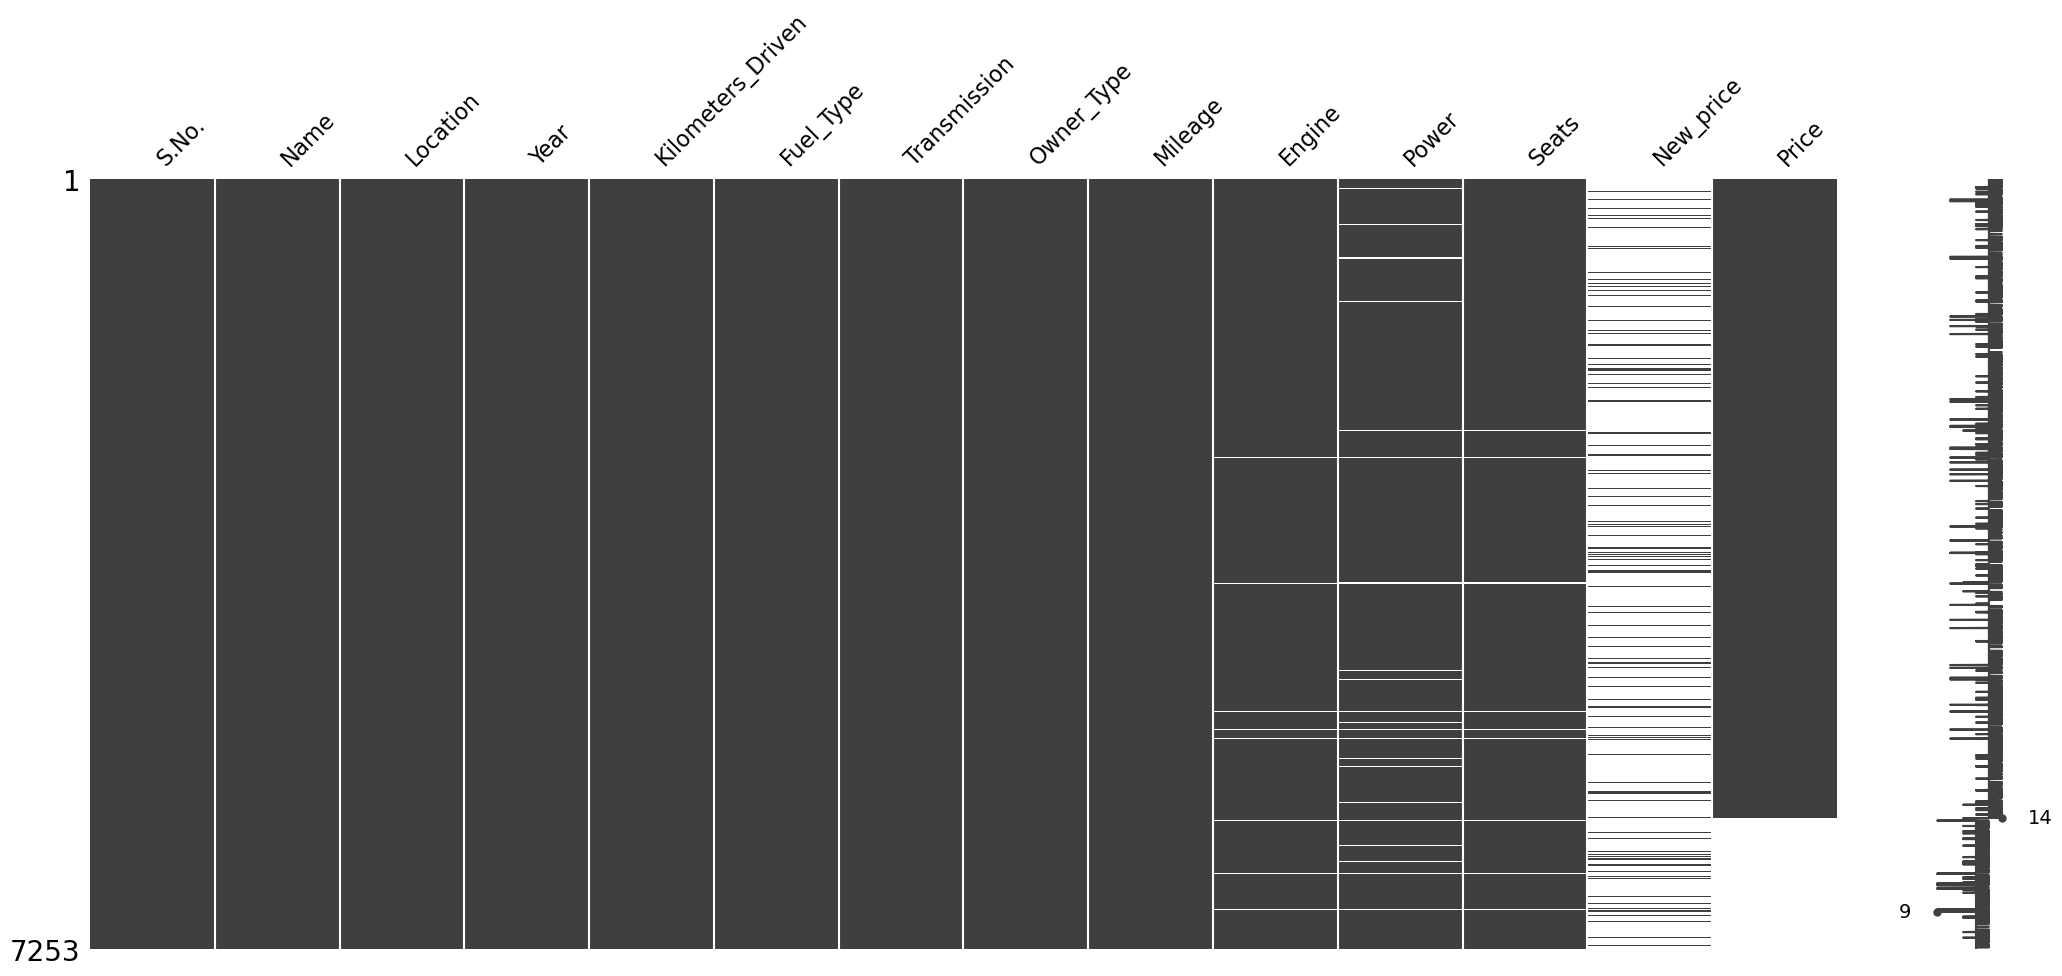

In [55]:
# use missingno to find how missing value is distributed
df = pd.read_csv('used_cars.csv')

# Plot the missing data pattern as a matrix
msno.matrix(df)

**Observations:**
- All missing values except Price appears to be at random.
- Starting at around 6000th data, the price starts to have NaN as the value, which indicate it is not missing at random.

In [56]:
# Dropping null price_log values since price is a dependent variable
data = data.dropna(subset=['Price_Log'])

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

- Over 50% of the cars were built within or after year 2014. The oldest car was manufactured at 1996. The average year is around 2013. 
- On average, the price of a used car will become about 40% of the price of a new car of the same model. This huge price different makes the customers lean toward second hand cars. According to 2021 Indian Blue Book, it is estimated that the second hand car marker will be 90% larger than new car market in 2025 FY.
- About 98.9% of second hand cars have fuel type of diesel or petrol. It is better to hold cars using these types of fuel as the other three types of fule is too less of a market compared to these two.
- Majority of the cars is first type ownership. This could either suggest that second hand buyers are less likely to sell, or it can suggest that second hand market still have a lot of potential as second hand buyers have yet to sell. We need to look for other information to determine which suggestion is more accurate. 
- There is high correlation between Engine and Power, it is better to drop one of them for final model.
- There is no significant price difference between each location. Which means location should not be an important factor.
- The missing values in price appears not to be missing at random. These rows will be dropped as there is no appropriate method to fill the missing values.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

**Answer:** 
- Price and Kilometers_Driven have their log columns, so the original can be removed.
- Name and Model are both categorical variables, but they have too many categories to use for model training.
- Price_Log is the dependent variable, so it needs to be removed from X.
- New_Price have too many missing values (over 80%) to be used in model training.
- Power is having high correlation with Engine

In [57]:
# create X and Y
Y = data['Price_Log']
X = data.drop(columns = {'Price', 'Kilometers_Driven', 'Name', 'Model', 'Price_Log', 'New_price', 'Power'})

In [58]:
# change categorical variables into numeric variables
X = pd.get_dummies(X, drop_first = True)

# using scaler to standardize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
Y = Y.reset_index(drop=True)

In [59]:
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [61]:
# create get model score function
def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)

    pred_test = model.predict(X_test)
    
    train_r2 = metrics.r2_score(Y_train, pred_train)
    
    test_r2 = metrics.r2_score(Y_test, pred_test)
    
    train_rmse = metrics.mean_squared_error(Y_train, pred_train, squared = False)
    
    test_rmse = metrics.mean_squared_error(Y_test, pred_test, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-square on training set : ", metrics.r2_score(Y_train, pred_train))
        
        print("R-square on test set : ", metrics.r2_score(Y_test, pred_test))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(Y_train, pred_train)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(Y_test, pred_test)))
    
    # Returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

**1) Linear Regression** <br>

In [76]:
LRmodel = LinearRegression()

In [77]:
LRmodel.fit(X_train, Y_train)

LinearRegression()

In [78]:
get_model_score(LRmodel)

R-square on training set :  0.8392376434947526
R-square on test set :  0.8386832062043301
RMSE on training set :  0.34997529392302856
RMSE on test set :  0.35133507535456693


[0.8392376434947526,
 0.8386832062043301,
 0.34997529392302856,
 0.35133507535456693]

**Observations:**
- The model gives similar score for train and test.
- The R-square score is high and the RMSE score is low, which is sign of good model.

In [65]:
# check model summary
x_train = sm.add_constant(X_train)

x_test = sm.add_constant(X_test)

olsModel = sm.OLS(Y_train, x_train).fit()

print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     962.2
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:39:31   Log-Likelihood:                -113.82
No. Observations:                4212   AIC:                             327.6
Df Residuals:                    4162   BIC:                             644.9
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

**Observations:**
- The numeric variables all have p-value less than 0.05
- 8 out of 10 locations have p-value less than 0.05
- 2 out of 4 fuel types have p-value less than 0.05
- The Transmission have p-value less than 0.05
- 1 out of 3 owner type have p-value less than 0.05
- 12 out of 29 brand have p-value less than 0.05

**2) Ridge / Lasso Regression** <br>

In [66]:
rmodel = Ridge()

In [67]:
rmodel.fit(X_train, Y_train)

Ridge()

In [68]:
get_model_score(rmodel)

R-square on training set :  0.9188803998829133
R-square on test set :  0.9086176364718759
RMSE on training set :  0.24860399634576905
RMSE on test set :  0.26443133155729803


[0.9188803998829133,
 0.9086176364718759,
 0.24860399634576905,
 0.26443133155729803]

<AxesSubplot:xlabel='Imp'>

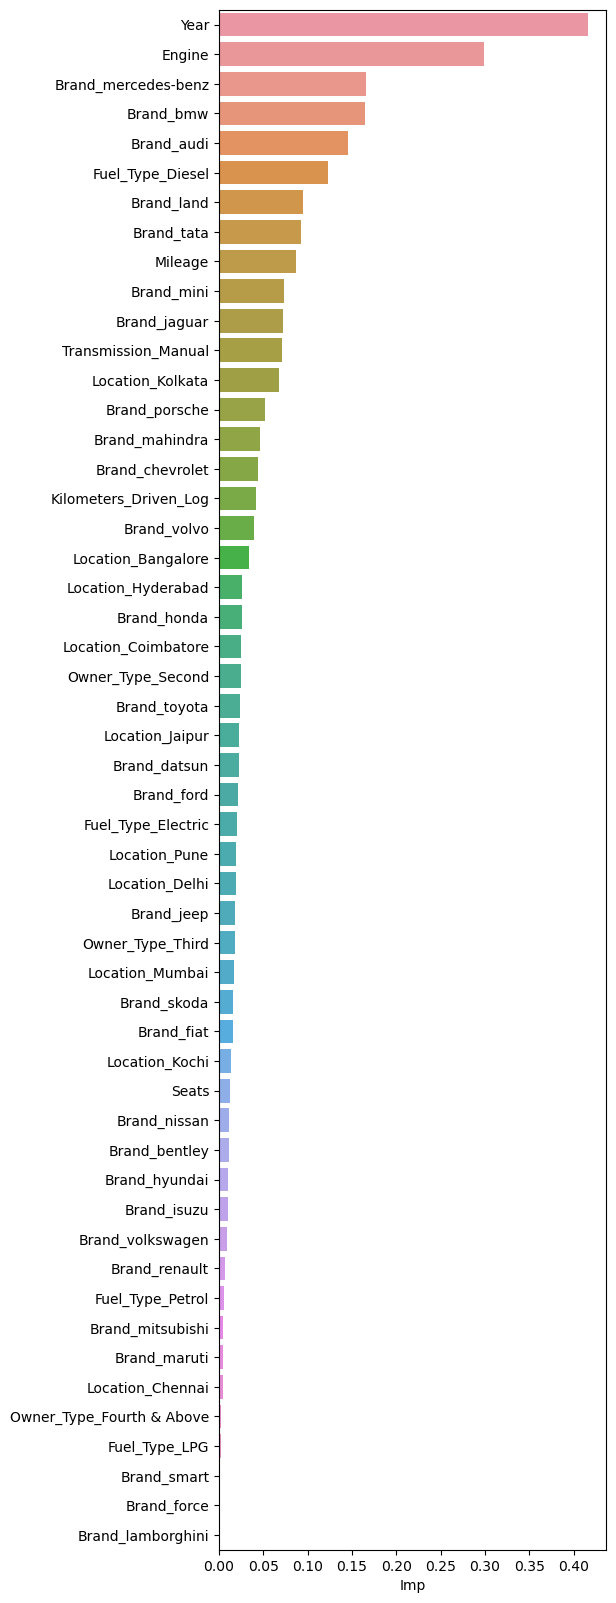

In [68]:
# check the importance of each variable by using absolute value of each coeffecient
r_imp_df = pd.DataFrame(np.abs(rmodel.coef_), columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False)
plt.figure(figsize = (5, 20))
sns.barplot(r_imp_df.Imp, r_imp_df.index)


In [69]:
# check coefficient values for each feature
r_coef_df = pd.DataFrame(rmodel.coef_, columns = ["Coef"], index = X.columns).sort_values(by = 'Coef', ascending = False)
r_coef_df

,Coef
Year,0.416120
Engine,0.298745
Brand_mercedes-benz,0.166245
Brand_bmw,0.164700
Brand_audi,0.144995
Fuel_Type_Diesel,0.122986
Brand_land,0.095073
Brand_mini,0.073578
Brand_jaguar,0.071987
Brand_porsche,0.051592


**Observations:**
- It performed very similar to Linear Regression Model
- According to this model, **Year, Engine and Brand** are the main factors.

**3) Decision Trees** <br>

In [70]:
dec_tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=4, min_samples_leaf=5, random_state=7)

In [71]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                      random_state=7)

In [72]:
get_model_score(dec_tree_model)

R-square on training set :  0.8488663408747352
R-square on test set :  0.8221222112340578
RMSE on training set :  0.33933277115605026
RMSE on test set :  0.36892881734131105


[0.8488663408747352,
 0.8221222112340578,
 0.33933277115605026,
 0.36892881734131105]

<AxesSubplot:xlabel='Imp'>

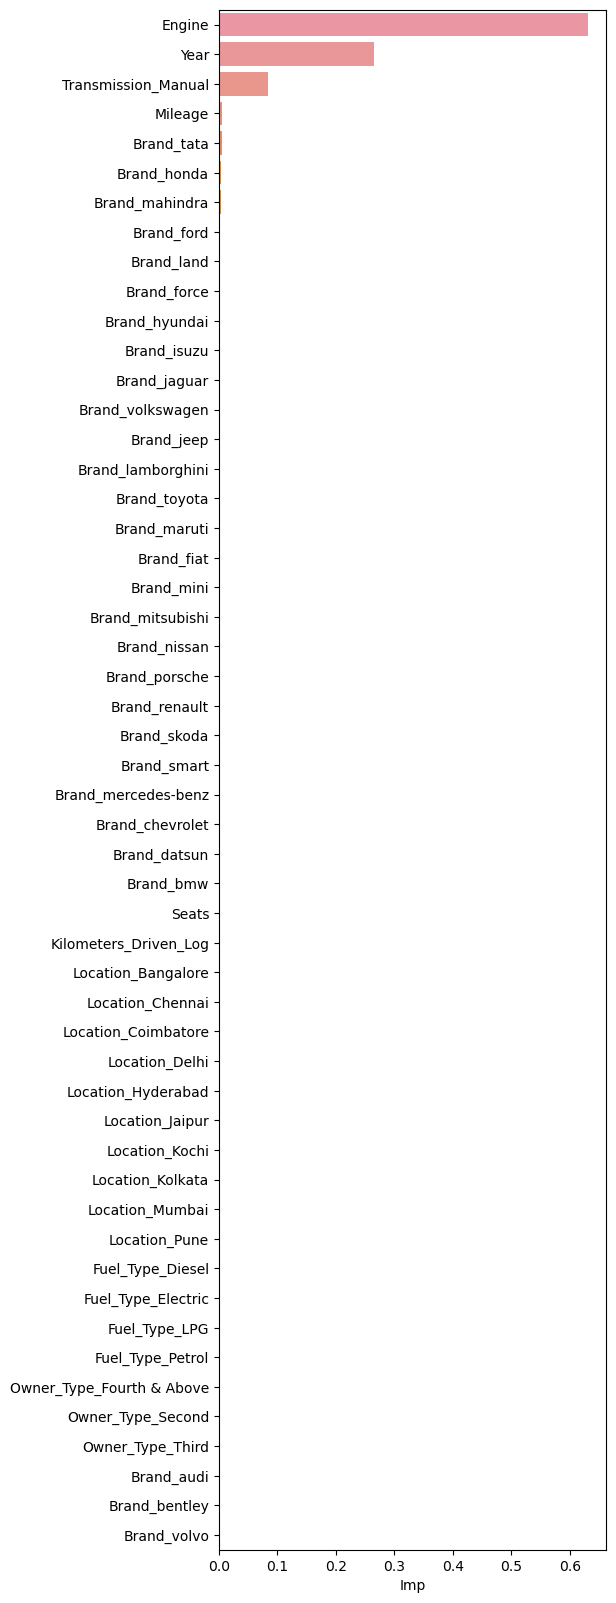

In [73]:
# find the importance of each feature
des_tree_imp_df = pd.DataFrame(dec_tree_model.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False)
plt.figure(figsize = (5, 20))
sns.barplot(des_tree_imp_df.Imp, des_tree_imp_df.index)


**Observations:**
- The performance is poor compared to previous models, this means the parameter values choosen is not a good choice.
- Decision Tree model requires hyperparameter tuning to improve the model.
- The importance distribution suggest that the model is having **high bias**, it is **over simplifying** problem.
- According to the importance level of this model, it seems like **Engine, Year and Transmission** are the major factors that determine the price.

**4) Random Forest** <br>

In [74]:
ran_forest_model = RandomForestRegressor(n_estimators=150, criterion='friedman_mse', random_state=7)

In [75]:
ran_forest_model.fit(X_train, Y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=150,
                      random_state=7)

In [76]:
get_model_score(ran_forest_model)

R-square on training set :  0.9905846956952887
R-square on test set :  0.921318078935041
RMSE on training set :  0.08469589968474689
RMSE on test set :  0.24536871930017126


[0.9905846956952887,
 0.921318078935041,
 0.08469589968474689,
 0.24536871930017126]

<AxesSubplot:xlabel='Imp'>

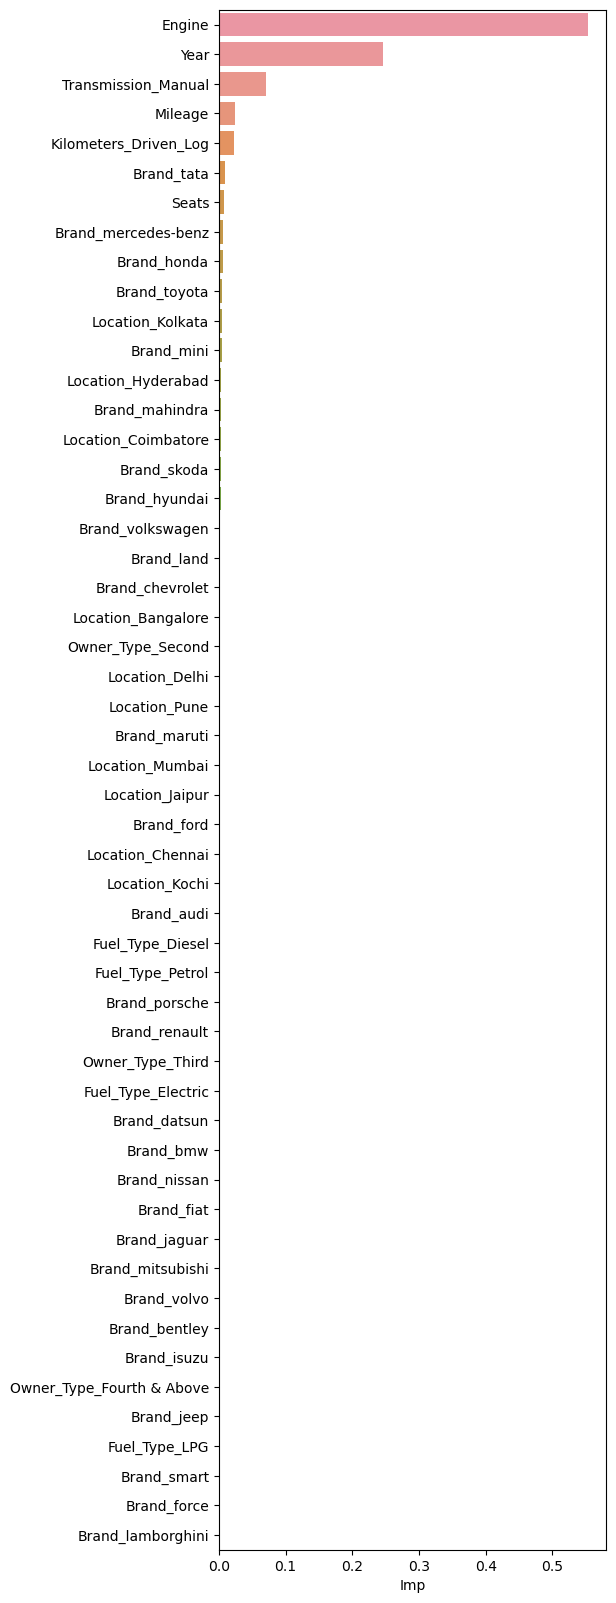

In [77]:
# find the importance of each feature
ran_tree_imp_df = pd.DataFrame(ran_forest_model.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False)
plt.figure(figsize = (5, 20))
sns.barplot(ran_tree_imp_df.Imp, ran_tree_imp_df.index)


**Observations:**
- This model performs better than other models.
- However, the high R-sqaure value and the difference between the R-square and RMSE suggests that this model is **overfitting** and requires further hyperparameter tuning.
- The top 5 important features are **Engine, Year, Transmission, Mileage, Kilimeters_Driven_Log**. Though the model is overfitting, it will give us a slight idea about which features are important.

### **Hyperparameter Tuning: Decision Tree**

In [78]:
# tuning Decision Tree with grid search cross validation
dec_tune = DecisionTreeRegressor(random_state=7)

params_dec = {
    'max_depth': [10, 15, 20, 25, 30, 35],
    'min_samples_split':[2, 5, 7, 10, 12, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'auto'],
}

dec_grid_search = GridSearchCV(estimator=dec_tune, param_grid=params_dec, scoring='r2', cv=5, n_jobs=-1)
dec_grid_search.fit(X_train, Y_train)

print("Best hyperparameters: ", dec_grid_search.best_params_)
print("Best score: ", dec_grid_search.best_score_)




Best hyperparameters:  {'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score:  0.8894368770616383


In [79]:
dec_tune = dec_grid_search.best_estimator_
dec_tune.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=25, max_features='auto', min_samples_split=10,
                      random_state=7)

In [80]:
get_model_score(dec_tune)

R-square on training set :  0.9778150965129083
R-square on test set :  0.8707665215095919
RMSE on training set :  0.13000916739934432
RMSE on test set :  0.3144627700296984


[0.9778150965129083,
 0.8707665215095919,
 0.13000916739934432,
 0.3144627700296984]

**Feature Importance**

<AxesSubplot:xlabel='Imp'>

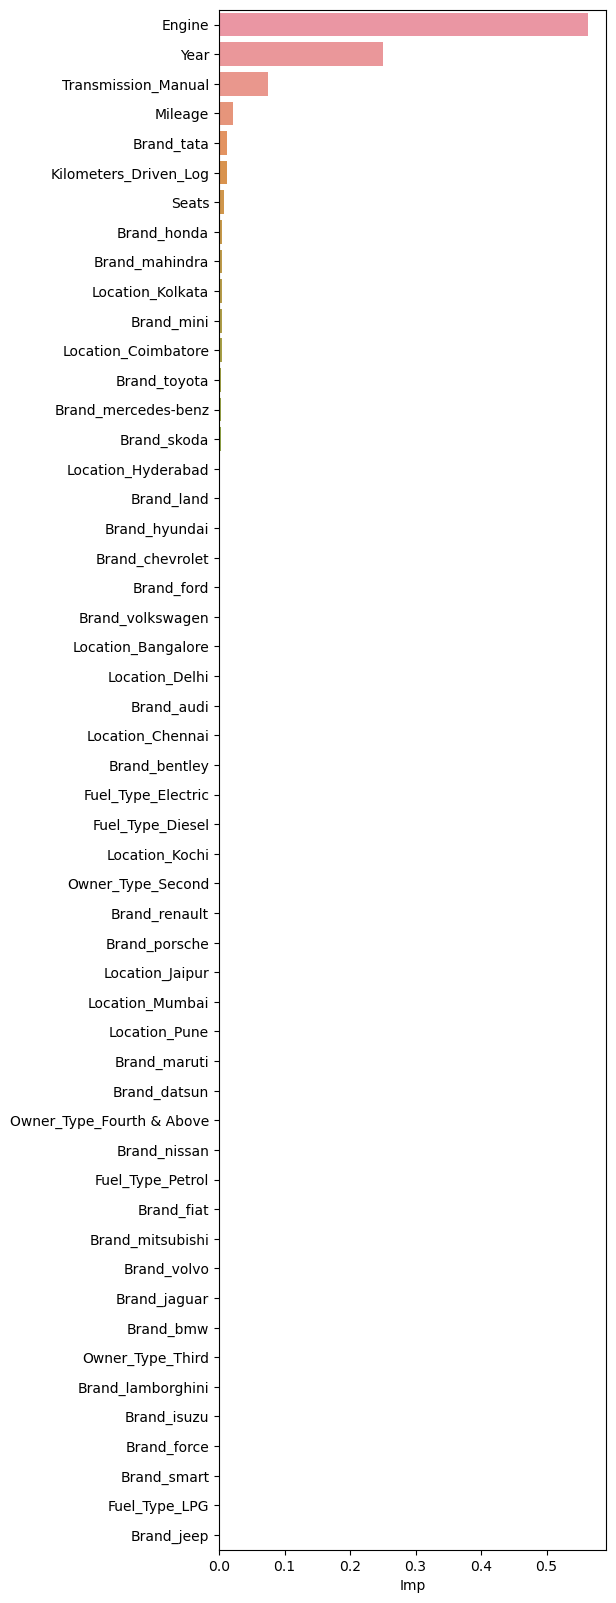

In [81]:
# find the importance of each feature
dec_tune_imp_df = pd.DataFrame(dec_tune.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False)
plt.figure(figsize = (5, 20))
sns.barplot(dec_tune_imp_df.Imp, dec_tune_imp_df.index)


**Observations:**
- The decision tree model after various tuning did not give out better model, the model is having reletively high bias.
- Judging by the scores, it is likely overfitting.
- It suggests that Engine, Year, and Transmission are the most important factors.

### **Hyperparameter Tuning: Random Forest**

In [82]:
# tuning Random Forest with grid search cross validation
rand_tune = RandomForestRegressor(random_state=7)

params_rand = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 15],
    'min_samples_split':[2, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'auto'],
}

rand_grid_search = GridSearchCV(estimator=rand_tune, param_grid=params_rand, scoring='r2', cv=5, n_jobs=-1)
rand_grid_search.fit(X_train, Y_train)

print("Best hyperparameters: ", rand_grid_search.best_params_)
print("Best score: ", rand_grid_search.best_score_)


Best hyperparameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.927523871570577


In [83]:
rand_tune = rand_grid_search.best_estimator_
rand_tune.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=7)

In [84]:
get_model_score(rand_tune)

R-square on training set :  0.9907437533896256
R-square on test set :  0.9263821872907222
RMSE on training set :  0.08397744623730846
RMSE on test set :  0.23734122170587463


[0.9907437533896256,
 0.9263821872907222,
 0.08397744623730846,
 0.23734122170587463]

**Feature Importance**

<AxesSubplot:xlabel='Imp'>

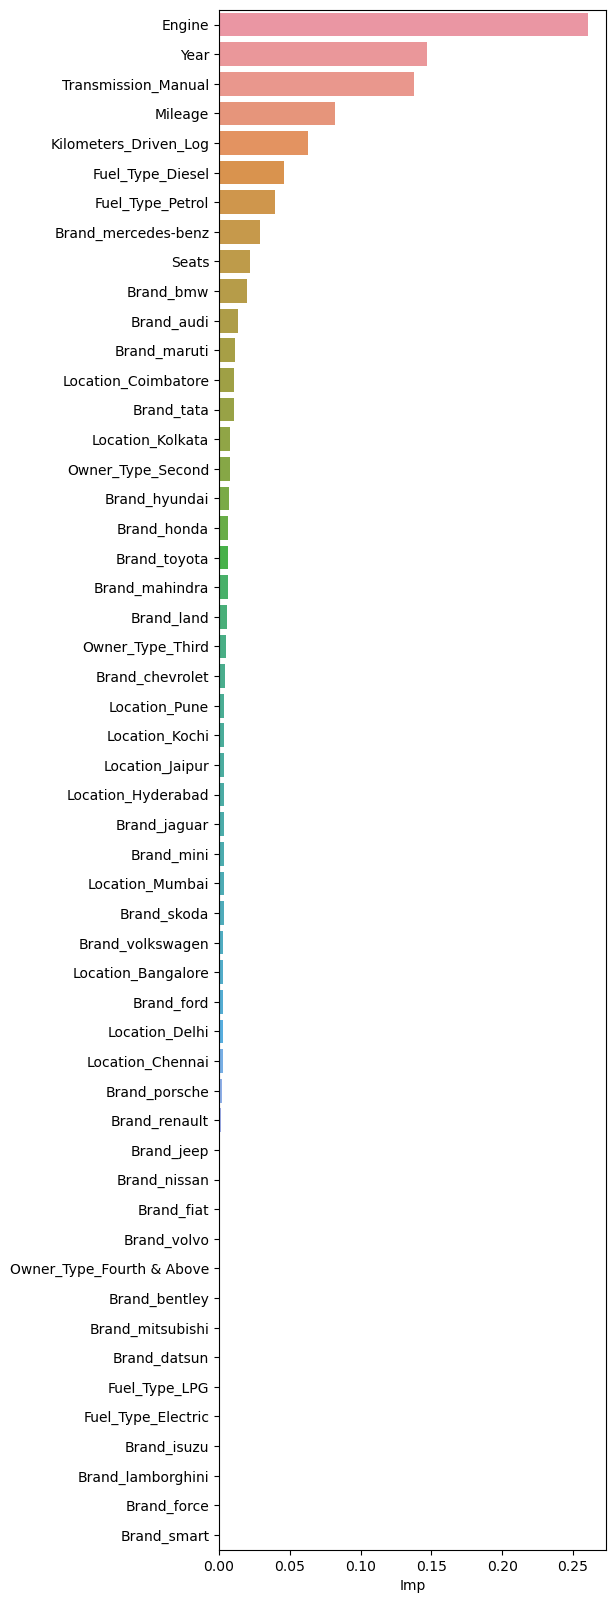

In [85]:
# find the importance of each feature
rand_tune_imp_df = pd.DataFrame(rand_tune.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False)
plt.figure(figsize = (5, 20))
sns.barplot(rand_tune_imp_df.Imp, rand_tune_imp_df.index)


**Observations:**
- The random forest regression model after various tuning is **still overfitting**.
- It is less biased compared to Decision Tree model.
- It suggests that **Engine, Year, and Transmission, Mileage, and Kilometers_Driven_Log** are the most important factors.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [86]:
models = [LRmodel, rmodel, dec_tune, rand_tune]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

for model in models:
    a, b, c, d = get_model_score(model, False)
    r2_train.append(a)
    r2_test.append(b)
    rmse_train.append(c)
    rmse_test.append(d)

In [87]:
# compare score of each model side by side
compare_frame = pd.DataFrame({'Model': ['Linear Regression', 'Ridge', 'Decision Tree', 'Random Forest'],
                             'Train_r2': r2_train,
                             'Test_r2': r2_test,
                             'Train_RMSE': rmse_train,
                             'Test_RMSE': rmse_test})
compare_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.918884,0.908181,0.248599,0.265063
1,Ridge,0.918880,0.908618,0.248604,0.264431
2,Decision Tree,0.977815,0.870767,0.130009,0.314463
3,Random Forest,0.990744,0.926382,0.083977,0.237341


**Answer:**
- The linear models have lower r2 score, however, their train score is **consistent** with test score, it suggests the models did not overfit. 
- Both decision tree and random forest model show high train_r2 score, but there exists large difference between train and test score, which means these two model is **likely overfitting**.
- In total, the **Ridge** model is performing relatively better.
- We can improve Ridge model further by using grid search and tune the alpha value for the model.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**Answer:**
- Though decision tree and random forest are overfitting, they suggest **Engine, Year, and Transmission** are important factors determining the price.
- According to Ridge model, which is not overfitting and also the **reletively better model**, it suggests **Year, Engine, and Brand** are the most important factors that **increase the price**, for Brand, the top three are **Mercedes-Benz, BMW, and Audi**. The top three brand **to avoid** are **Tata, Mahindra, and Chevrolet**. Aside from brand, the three main factors that **decrease** the price are **Mileage, Manual Transmission, and selling in Kolkata**.


**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

**Answer:**
I propose to adope the Ridge model, because it has the lowest difference between train and test scores. The linear regression model have slight higher difference between train and test scores, which means it has lower performance for new data. The decision tree model and random forest model gives out high difference between train and test scores, which means it is overfitting and will not perform well for new data.